## Part 4: Try a More Complex Neural Model - Fashion-MNIST Data

Now let's build and train a more complext neural network for a complext dataset. We will be using the Fashion-MNIST dataset, a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of our network, and a better representation of datasets that we will use in the real world.

The steps are similar to what we do in the previous part.
* [Load a dataset](#load)
* [Build a Network](#build)
* [Train the Network](#train) 
* [Test the Network](#test)

<a id = 'load'></a>
## Load a Dataset

First off, let's load the dataset through torchvision.

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch 
from torch import nn
from torch import optim
import torch.nn.functional as F
from collections import OrderedDict

from torchvision import datasets, transforms
import helper

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download = True, train = True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle=True)

# Download and load the testing data
testset = datasets.FashionMNIST('F_MNIST_data/', download = True, train = False, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

Take a look at one of the image

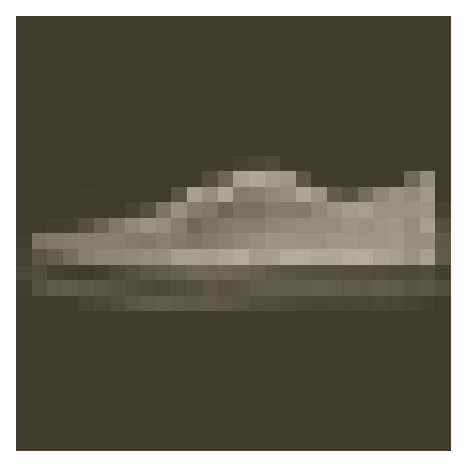

In [3]:
images, labels = next(iter(trainloader))
helper.imshow(images[0])

Check the size of the images to prepare for building the network 

<a id = 'build'></a>
## Build the Network

For this dataset MNIST, each image is 28x28 which is a total of 784 pixels, and there are 10 classes. 

We are going to build 3 hidden layers. Using ReLu activations for the layers and to return the logits from the forward pass. 

In [4]:
# Define your network architecture here

# Hyperparameters for the network 
input_size = 784
hidden_layer = [256, 128, 64]
output_size = 10

model = nn.Sequential(OrderedDict([
                        ('fc1', nn.Linear(input_size,hidden_layer[0])),
                        ('relu1', nn.ReLU()),
                        ('fc2', nn.Linear(hidden_layer[0],hidden_layer[1])),
                        ('relu2', nn.ReLU()),
                        ('fc3', nn.Linear(hidden_layer[1], hidden_layer[2])),
                        ('relu3', nn.ReLU()),
                        ('logits', nn.Linear(hidden_layer[2], output_size))]))

In [5]:
# take a look at the model parameters
model.parameters

<bound method Module.parameters of Sequential(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (relu3): ReLU()
  (logits): Linear(in_features=64, out_features=10, bias=True)
)>

<a id = 'train'></a>
## Train the Network

Now we created the network, we can start to train it. First you'll want to define [the criterion](http://pytorch.org/docs/master/nn.html#loss-functions) ( something like `nn.CrossEntropyLoss`) and [the optimizer](http://pytorch.org/docs/master/optim.html) (typically `optim.SGD` or `optim.Adam`).

Steps for training the network: 

* Make a forward pass through the network to get the logits 
* Use the logits to calculate the loss
* Perform a backward pass through the network with `loss.backward()` to calculate the gradients
* Take a step with the optimizer to update the weights


In [6]:
# Create the network, define the criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr = 0.01)

In [7]:
# Train the network

epochs = 3
print_every = 40
steps = 0

for e in range(epochs):
    running_loss = 0
    
    for images, labels in iter(trainloader):
        steps += 1
        
        # Flatten MNIST images into a 784 long vector 
        images.resize_(images.shape[0],784)
        
        # zero out the gradients since they get accumulated
        optimizer.zero_grad()
        
        # forward, backward and update weights
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0: 
            print("Epoch: {}/{}".format(e+1,epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/3 Loss: 2.2862
Epoch: 1/3 Loss: 2.2442
Epoch: 1/3 Loss: 2.1854
Epoch: 1/3 Loss: 2.0813
Epoch: 1/3 Loss: 1.9117
Epoch: 1/3 Loss: 1.7083
Epoch: 1/3 Loss: 1.5281
Epoch: 1/3 Loss: 1.3743
Epoch: 1/3 Loss: 1.2336
Epoch: 1/3 Loss: 1.1304
Epoch: 1/3 Loss: 1.0292
Epoch: 1/3 Loss: 0.9688
Epoch: 1/3 Loss: 0.9256
Epoch: 1/3 Loss: 0.8864
Epoch: 1/3 Loss: 0.8495
Epoch: 1/3 Loss: 0.8037
Epoch: 1/3 Loss: 0.7830
Epoch: 1/3 Loss: 0.7869
Epoch: 1/3 Loss: 0.7396
Epoch: 1/3 Loss: 0.7204
Epoch: 1/3 Loss: 0.7200
Epoch: 1/3 Loss: 0.7110
Epoch: 1/3 Loss: 0.6944
Epoch: 2/3 Loss: 0.3737
Epoch: 2/3 Loss: 0.6513
Epoch: 2/3 Loss: 0.6545
Epoch: 2/3 Loss: 0.6305
Epoch: 2/3 Loss: 0.6552
Epoch: 2/3 Loss: 0.6356
Epoch: 2/3 Loss: 0.6180
Epoch: 2/3 Loss: 0.6620
Epoch: 2/3 Loss: 0.6313
Epoch: 2/3 Loss: 0.6347
Epoch: 2/3 Loss: 0.6296
Epoch: 2/3 Loss: 0.6191
Epoch: 2/3 Loss: 0.5877
Epoch: 2/3 Loss: 0.6023
Epoch: 2/3 Loss: 0.6038
Epoch: 2/3 Loss: 0.5662
Epoch: 2/3 Loss: 0.6092
Epoch: 2/3 Loss: 0.5608
Epoch: 2/3 Loss:

<a id = 'test'></a>
## Test the Model

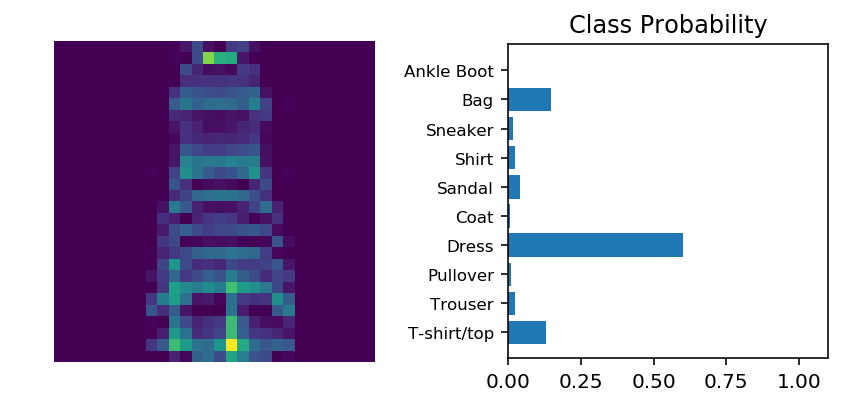

In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# pick one image
img = images[0]
#convert 2D image to 1D vector
img = img.resize_(1,784)

# calculate the class probabilities(softmax) for img
logits = model.forward(img)
ps = F.softmax(logits, dim = 1)

# plot the test image and our prediction
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

The model does predict the image to be a dress. 